In [308]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import seaborn as sns

In [246]:
df = pd.read_csv('network_edges.txt',header=None)
df.columns= ['from','to','weight']

In [292]:
f = open("app_communities_layer1.txt", "r")
cf_txt = f.read()
comms = dict(json.loads(cf_txt))

In [247]:
edges = list(df.to_records(index=False))

In [248]:
#sampled_edges = random.sample(k=10000, population=edges)

In [249]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [250]:
#nx.write_gexf(G, 'network.gexf')

In [319]:
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [315]:
colors = list(sns.color_palette("magma"))

[(0.135053, 0.068391, 0.315), (0.372116, 0.092816, 0.499053), (0.594508, 0.175701, 0.501241), (0.828886, 0.262229, 0.430644), (0.973381, 0.46152, 0.361965), (0.997341, 0.733545, 0.505167)]


In [326]:
def get_node_colors(G):
    nodes = list(G.nodes)
    node_colors = []
    for node in nodes:
        if comms[node] == 0:
            node_colors.append(colors[1])
        elif comms[node] == 1:
            node_colors.append(colors[3])
        elif comms[node] == 2:
            node_colors.append(colors[5])
    return node_colors

In [252]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

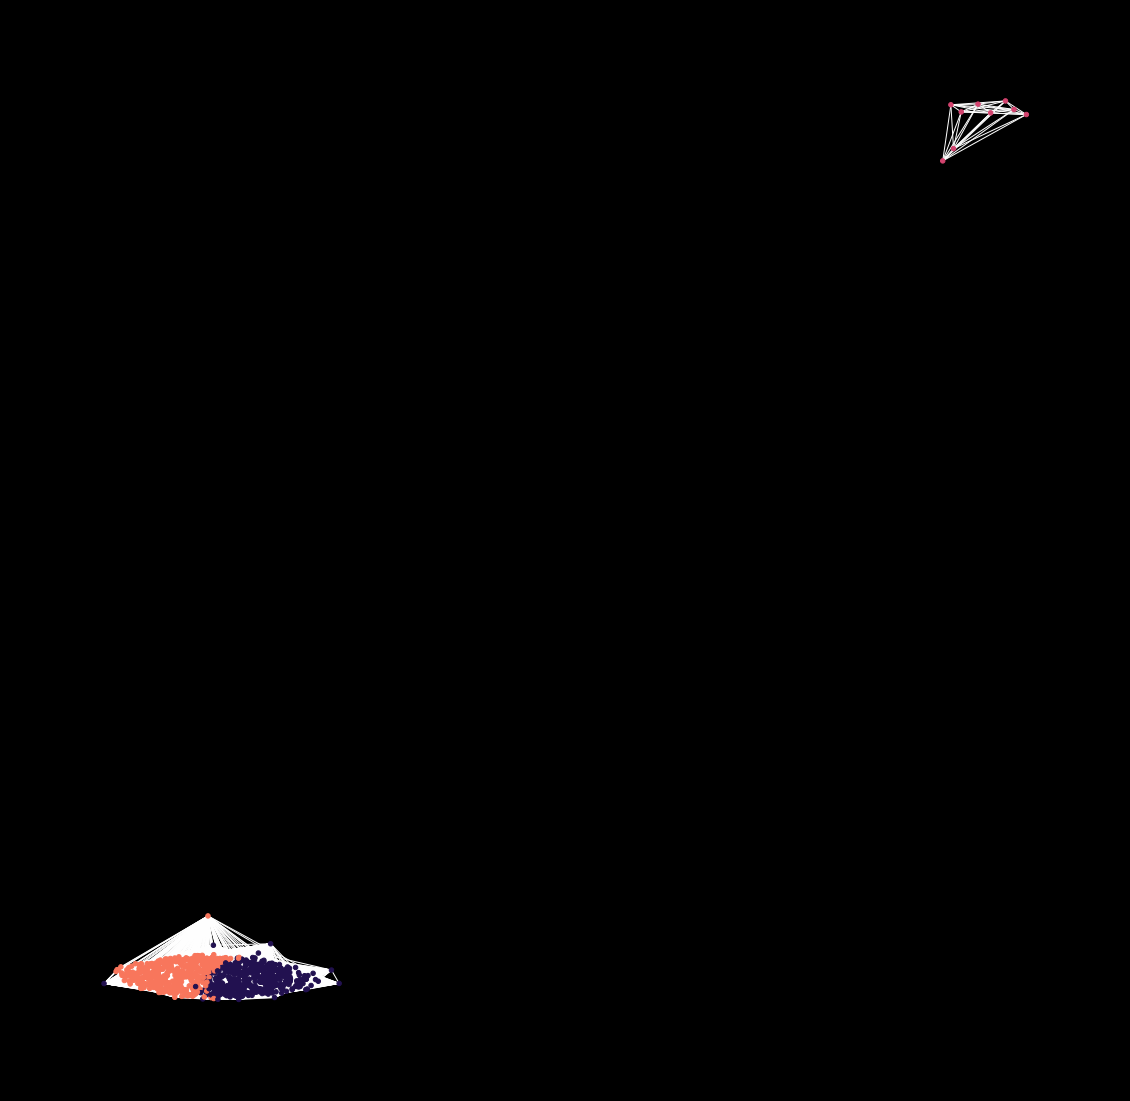

In [343]:
Gs = G # S[0], S[1], G
#plt.figure(figsize=(20,20),dpi=80) 
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
pos = nx.spring_layout(G,k=0.055,iterations=60)
nx.draw(Gs, pos, node_size=20, node_color=get_node_colors(Gs), edge_color="#FFFFFF", alpha=1)
fig.set_facecolor('black')

#nx.draw(G, pos, node_color=color_map,node_size=node_sizes,edge_color="#afafaf")

#nx.draw_spring(G, node_color=color_map, with_labels = False,node_size = node_sizes, edge_color = "#D4D5CE")
#nx.draw_networkx(G,labels=False)